In [161]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# File to Load
most_freq_mutations_metastatic = Path("new_data/most-frequently-mutated-genes-metastatic.json")
most_freq_mutations_primary = Path("new_data/most-frequently-mutated-genes-primary.json")

# Read files and store into Pandas DataFrames
most_freq_metastatic_df= pd.read_json(most_freq_mutations_metastatic)
most_freq_primary_df = pd.read_json(most_freq_mutations_primary)

# Combine the data into a single dataset.  
shared_genes_freq = pd.merge(most_freq_primary_df, most_freq_metastatic_df, how="inner", on=['label'])
shared_genes_freq.columns = ['Gene', 'Primary', 'Metastatic']
shared_genes_freq.head()

new_merge = pd.merge(most_freq_primary_df, most_freq_metastatic_df, how="outer", on=['label'],indicator=True)
only_pri = new_merge[new_merge['_merge'] == 'left_only']
print(only_pri)

     label   value_x  value_y     _merge
19  CTNND2  20.20202      NaN  left_only


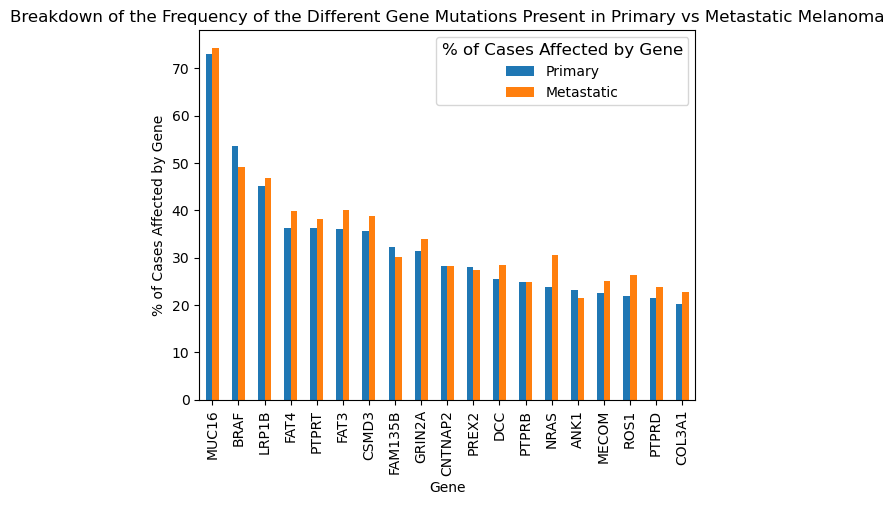

In [137]:
#Make a grouped bar chart that has both
shared_genes_grouped = shared_genes_freq.groupby(['Gene'])
shared_genes_freq.set_index('Gene', inplace=True)
shared_genes_freq.plot(kind='bar',rot=0)

plt.xlabel('Gene')
plt.ylabel('% of Cases Affected by Gene')
plt.title('Breakdown of the Frequency of the Different Gene Mutations Present in Primary vs Metastatic Melanoma')
plt.legend(title='% of Cases Affected by Gene', title_fontsize='large')
plt.xticks(rotation='vertical')
    
plt.show()

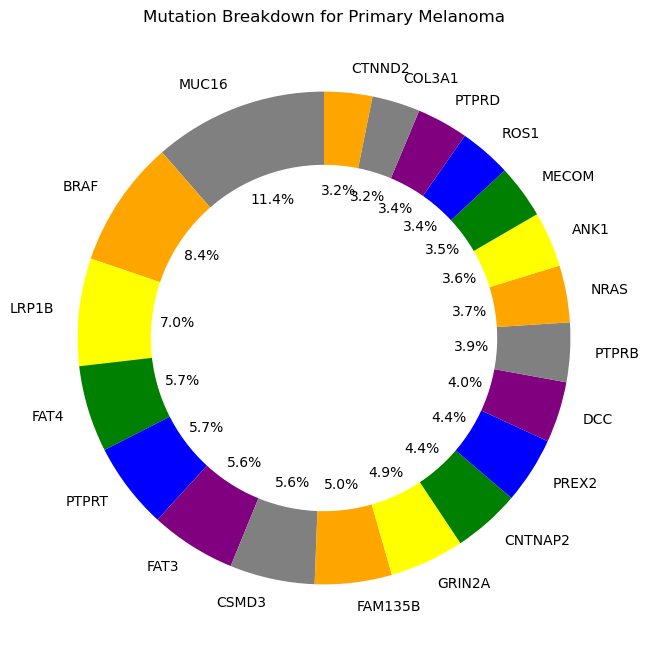

In [156]:
#Pie chart primary melanoma
shared_genes_pie = most_freq_primary_df
shared_genes_pie.columns = ['Gene', 'Primary']
values_pri = shared_genes_pie['Primary']
categories_pri = shared_genes_pie['Gene']

plt.figure(figsize=(8, 8))
plt.pie(values_pri, labels=categories_pri, autopct='%1.1f%%',startangle=90,colors=['grey','orange','yellow','green','blue','purple'])
plt.title('Mutation Breakdown for Primary Melanoma')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))
plt.show()

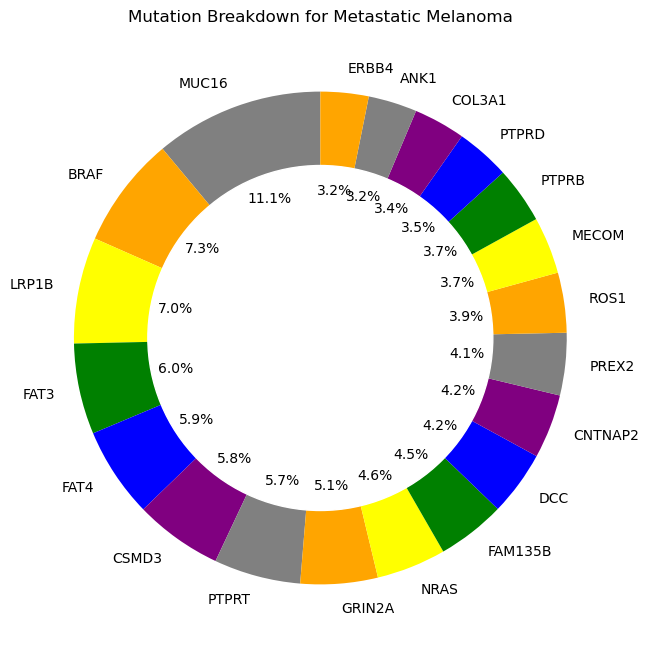

In [157]:
#Pie chart metastatic melanoma
shared_genes_pie = most_freq_metastatic_df
shared_genes_pie.columns = ['Gene', 'Metastatic']
values_pri = shared_genes_pie['Metastatic']
categories_pri = shared_genes_pie['Gene']

plt.figure(figsize=(8, 8))
plt.pie(values_pri, labels=categories_pri, autopct='%1.1f%%',startangle=90,colors=['grey','orange','yellow','green','blue','purple'])
plt.title('Mutation Breakdown for Metastatic Melanoma')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))
plt.show()

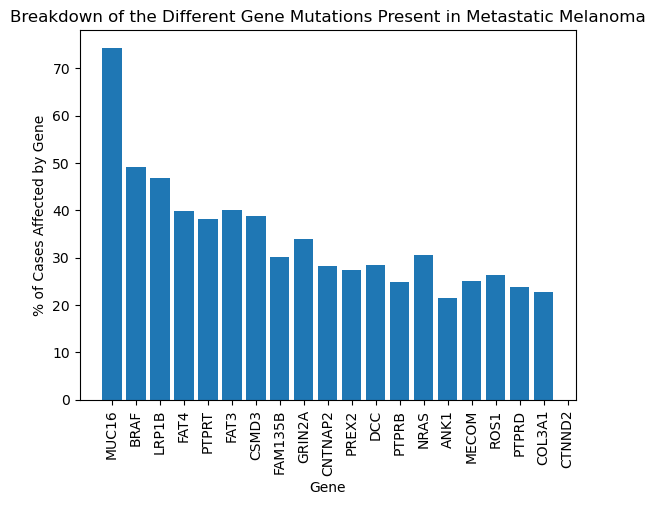

In [61]:
#Create Bar graph for the metastatic melanoma gene mutations
plt.bar(shared_genes_freq['Gene'],shared_genes_freq['% of Cases Affected Met'])
plt.xlabel('Gene')
plt.ylabel('% of Cases Affected by Gene')
plt.title('Breakdown of the Different Gene Mutations Present in Metastatic Melanoma')
plt.xticks(rotation='vertical')
plt.show()

In [22]:
# File to Load
NRAS_mutations_metastatic = Path("gene_mutations_files/NRAS_mutations_metastatic.csv")
NRAS_mutations_primary = Path("gene_mutations_files/NRAS_mutations_primary.csv")

# Read BRAF files and store into Pandas DataFrames
NRAS_mut_met = pd.read_csv(NRAS_mutations_metastatic)
NRAS_mut_pri = pd.read_csv(NRAS_mutations_primary)

# Combine the data into a single dataset.  
NRAS_mut_complete = pd.merge(NRAS_mut_met, NRAS_mut_pri, how="outer", on=["DNA Change", "DNA Change"])
NRAS_mut_complete.head()

,DNA Change,Type_x,Consequences_x,# Affected Cases in Cohort_x,# Affected Cases Across the GDC_x,Impact_x,Survival_x,Type_y,Consequences_y,# Affected Cases in Cohort_y,# Affected Cases Across the GDC_y,Impact_y,Survival_y
0,chr1:g.114713908T>C,Substitution,Missense NRAS Q61R,"49 / 210,23.33%","184 / 14,783","VEP: MODERATE, SIFT: tolerated - score 0.06, P...",add to survival plot,Substitution,Missense NRAS Q61R,"28 / 149,18.79%","184 / 14,783","VEP: MODERATE, SIFT: tolerated - score 0.06, P...",add to survival plot
1,chr1:g.114713909G>T,Substitution,Missense NRAS Q61K,"36 / 210,17.14%","132 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0.01,...",add to survival plot,Substitution,Missense NRAS Q61K,"24 / 149,16.11%","132 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0.01,...",add to survival plot
2,chr1:g.114713908T>A,Substitution,Missense NRAS Q61L,"16 / 210,7.62%","35 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense NRAS Q61L,"13 / 149,8.72%","35 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
3,chr1:g.114713907T>A,Substitution,Missense NRAS Q61H,"4 / 210,1.90%","14 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense NRAS Q61H,"1 / 149,0.67%","14 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
4,chr1:g.114713907T>G,Substitution,Missense NRAS Q61H,"3 / 210,1.43%","15 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense NRAS Q61H,"3 / 149,2.01%","15 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot


In [23]:
# File to Load
TP53_mutations_metastatic = Path("gene_mutations_files/TP53_mutations_metastatic.csv")
TP53_mutations_primary = Path("gene_mutations_files/TP53_mutations_primary.csv")

# Read BRAF files and store into Pandas DataFrames
TP53_mut_met = pd.read_csv(TP53_mutations_metastatic)
TP53_mut_pri = pd.read_csv(TP53_mutations_primary)

# Combine the data into a single dataset.  
TP53_mut_complete = pd.merge(TP53_mut_met, TP53_mut_pri, how="outer", on=["DNA Change", "DNA Change"])
TP53_mut_complete.head()

,DNA Change,Type_x,Consequences_x,# Affected Cases in Cohort_x,# Affected Cases Across the GDC_x,Impact_x,Survival_x,Type_y,Consequences_y,# Affected Cases in Cohort_y,# Affected Cases Across the GDC_y,Impact_y,Survival_y
0,chr17:g.7674894G>A,Substitution,Stop Gained TP53 R213*,"5 / 163,3.07%","89 / 14,783",VEP: HIGH,add to survival plot,Substitution,Stop Gained TP53 R213*,"6 / 123,4.88%","89 / 14,783",VEP: HIGH,add to survival plot
1,chr17:g.7673781C>T,Substitution,Missense TP53 R280K,"4 / 163,2.45%","21 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0.04,...",add to survival plot,Substitution,Missense TP53 R280K,"2 / 123,1.63%","21 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0.04,...",add to survival plot
2,chr17:g.7674945G>A,Substitution,Stop Gained TP53 R196*,"3 / 163,1.84%","66 / 14,783",VEP: HIGH,add to survival plot,Substitution,Stop Gained TP53 R196*,"3 / 123,2.44%","66 / 14,783",VEP: HIGH,add to survival plot
3,chr17:g.7674241G>A,Substitution,Missense TP53 S241F,"3 / 163,1.84%","25 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense TP53 S241F,"2 / 123,1.63%","25 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
4,chr17:g.7675232G>A,Substitution,Missense TP53 S127F,"2 / 163,1.23%","15 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# File to Load
melanoma_top_genes_met = Path("gene_mutations_files/melanoma_top_100_genes_metastatic.csv")
melanoma_top_genes_pri = Path("gene_mutations_files/melanoma_top_100_genes_primary.csv")

# Read BRAF files and store into Pandas DataFrames
top_genes_met = pd.read_csv(melanoma_top_genes_met)
top_genes_pri = pd.read_csv(melanoma_top_genes_pri)

# Combine the data into a single dataset.  
top_genes_complete = pd.merge(top_genes_met, top_genes_pri, how="outer", on=["Symbol", "Symbol"])
top_genes_complete.head()

,Symbol,Name_x,# SSM Affected Cases in Cohort_x,# SSM Affected Cases Across the GDC_x,# CNV Gain_x,# CNV Loss_x,# Mutations_x,Annotations_x,Survival_x,Name_y,# SSM Affected Cases in Cohort_y,# SSM Affected Cases Across the GDC_y,# CNV Gain_y,# CNV Loss_y,# Mutations_y,Annotations_y,Survival_y
0,MUC16,"mucin 16, cell surface associated",284 / 382 (74.35%),"2,824 / 14,783",48 / 366 (13.11%),60 / 366 (16.39%),"1,504",Cancer Gene Census,add to survival plot,"mucin 16, cell surface associated",217 / 297 (73.06%),"2,824 / 14,783",28 / 294 (9.52%),50 / 294 (17.01%),"1,171",Cancer Gene Census,add to survival plot
1,BRAF,"B-Raf proto-oncogene, serine/threonine kinase",188 / 382 (49.21%),"947 / 14,783",193 / 366 (52.73%),10 / 366 (2.73%),34,Cancer Gene Census,add to survival plot,"B-Raf proto-oncogene, serine/threonine kinase",159 / 297 (53.54%),"947 / 14,783",160 / 294 (54.42%),10 / 294 (3.40%),30,Cancer Gene Census,add to survival plot
2,LRP1B,LDL receptor related protein 1B,179 / 382 (46.86%),"1,742 / 14,783",61 / 366 (16.67%),34 / 366 (9.29%),367,Cancer Gene Census,add to survival plot,LDL receptor related protein 1B,134 / 297 (45.12%),"1,742 / 14,783",46 / 294 (15.65%),31 / 294 (10.54%),280,Cancer Gene Census,add to survival plot
3,FAT3,FAT atypical cadherin 3,153 / 382 (40.05%),"1,392 / 14,783",31 / 366 (8.47%),133 / 366 (36.34%),279,Cancer Gene Census,add to survival plot,FAT atypical cadherin 3,107 / 297 (36.03%),"1,392 / 14,783",21 / 294 (7.14%),109 / 294 (37.07%),208,Cancer Gene Census,add to survival plot
4,FAT4,FAT atypical cadherin 4,152 / 382 (39.79%),"1,394 / 14,783",36 / 366 (9.84%),92 / 366 (25.14%),305,Cancer Gene Census,add to survival plot,FAT atypical cadherin 4,108 / 297 (36.36%),"1,394 / 14,783",26 / 294 (8.84%),73 / 294 (24.83%),238,Cancer Gene Census,add to survival plot


In [109]:
# File to Load
most_freq_mutations_metastatic = Path("new_data/most-frequently-mutated-genes-metastatic.json")
most_freq_mutations_primary = Path("new_data/most-frequently-mutated-genes-primary.json")

# Read BRAF files and store into Pandas DataFrames
most_freq_metastatic_df= pd.read_json(most_freq_mutations_metastatic)
most_freq_primary_df = pd.read_json(most_freq_mutations_primary)

# Combine the data into a single dataset.  
#top_genes_complete = pd.merge(top_genes_met, top_genes_pri, how="outer", on=["Symbol", "Symbol"])
#top_genes_complete.head()
#print(test3)
#print(test4)
shared_genes_freq = pd.merge(most_freq_primary_df, most_freq_metastatic_df, how="left", on=["label", "label"])
shared_genes_freq.columns = ['Gene', '% of Cases Affected Pri', '% of Cases Affected Met']
shared_genes_freq.head()

,Gene,% of Cases Affected Pri,% of Cases Affected Met
0,MUC16,73.063973,74.345550
1,BRAF,53.535354,49.214660
2,LRP1B,45.117845,46.858639
3,FAT4,36.363636,39.790576
4,PTPRT,36.363636,38.219895


In [110]:
# Files to Load
BRAF_mutations_metastatic = Path("gene_mutations_files/BRAF_mutations_metastatic.csv")
BRAF_mutations_primary = Path("gene_mutations_files/BRAF_mutations_primary.csv")

# Read BRAF files and store into Pandas DataFrames
BRAF_mut_met = pd.read_csv(BRAF_mutations_metastatic)
BRAF_mut_pri = pd.read_csv(BRAF_mutations_primary)

# Combine the data into a single dataset.  
BRAF_mut_complete = pd.merge(BRAF_mut_met, BRAF_mut_pri, how="outer", on=["DNA Change", "DNA Change"])
BRAF_mut_complete.head()

,DNA Change,Type_x,Consequences_x,# Affected Cases in Cohort_x,# Affected Cases Across the GDC_x,Impact_x,Survival_x,Type_y,Consequences_y,# Affected Cases in Cohort_y,# Affected Cases Across the GDC_y,Impact_y,Survival_y
0,chr7:g.140753336A>T,Substitution,Missense BRAF V640E,"156 / 259,60.23%","619 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense BRAF V640E,"133 / 210,63.33%","619 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
1,chr7:g.140753337C>T,Substitution,Missense BRAF V640M,"25 / 259,9.65%","39 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense BRAF V640M,"30 / 210,14.29%","39 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
2,chr7:g.140753334T>C,Substitution,Missense BRAF K641E,"5 / 259,1.93%","15 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense BRAF K641E,"5 / 210,2.38%","15 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
3,chr7:g.140781611C>T,Substitution,Missense BRAF G506E,"4 / 259,1.54%","11 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot,Substitution,Missense BRAF G506E,"3 / 210,1.43%","11 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0, Po...",add to survival plot
4,chr7:g.140781608G>A,Substitution,Missense BRAF S507L,"4 / 259,1.54%","4 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0.02,...",add to survival plot,Substitution,Missense BRAF S507L,"3 / 210,1.43%","4 / 14,783","VEP: MODERATE, SIFT: deleterious - score 0.02,...",add to survival plot
